In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
matplotlib.rcParams['font.family'] = ['DengXian', 'sans-serif']

In [3]:
fn = 'phone_data2.csv'
df = pd.read_csv(fn)
c = df['CPU'].astype('category')

In [4]:
widths  = [4, 1]
heights = [5, 1]
gs_kw   = dict(width_ratios=widths, height_ratios=heights)

In [5]:
plt.close()

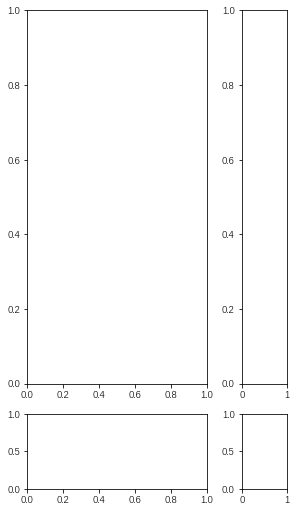

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True,
                             gridspec_kw=gs_kw, figsize=(4,7))

In [7]:
gs = axes[1,0].get_gridspec()

In [8]:
for ax in axes[1]:
    ax.remove()

In [9]:
ax_buttom = fig.add_subplot(gs[1,:])

问题：

axes变更并不会随着以上操作更新，所以如何取得最新的axes呢？但这其实也不是一个大问题，因为坐标空间可以通过ax_buttom获得，我猜测，fig会有最新的axes

fig.axes真的有，但是subplots的返回值是np.array，而fig.axes是list，这个问题先封箱了。

### enumerate(iterable, start=0)

> Return an enumerate object. iterable must be a sequence, an iterator, or some other object which supports iteration. The __next__() method of the iterator returned by enumerate() returns a tuple containing a count (from start which defaults to 0) and the values obtained from iterating over iterable.

**enumerate**函数的返回值是enumerate对象。:-)

就是给list等迭代器的每个元素加一个序号。

In [88]:
for a,b in (enumerate(c.cat.categories)):
    print(a,b)


0 A13
1 骁龙625
2 骁龙660
3 骁龙765G
4 骁龙865
5 麒麟820
6 麒麟980
7 麒麟990


In [94]:
for i in range(len(c.cat.categories)):
    axes[0,0].scatter('宽', '长', s = '重', c = 'C%d' % (i+1), alpha = 0.5, 
               data = df[df['CPU'] == c.cat.categories[i]],
               label = c.cat.categories[i])

In [95]:
axes[0,0].set_xlim(0, 100)
axes[0,0].set_ylim(0, 200)
axes[0,0].set_aspect('equal', 'box')

----

以stem表示重量，用scatter同样的颜色

In [107]:
df[df['CPU']=='骁龙865'].index

Int64Index([5, 6, 8, 9, 14], dtype='int64')

In [96]:
row,col = df.shape

In [49]:
df['厂牌'] + df['name']

0             苹果11
1         苹果11 pro
2     苹果11 Pro max
3            苹果SE2
4         小米10 青春版
5             小米10
6         小米10 Pro
7          小米Max 2
8         三星S20 5G
9        三星S20 5G+
10       华为P40 Pro
11           华为P30
12        华为畅享 MAX
13           荣耀30S
14        iQOONeo3
dtype: object

In [30]:
np.arange(1, row+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [101]:
#axes[1,0].cla()
ax_buttom.stem(np.arange(row), df['厚'], markerfmt='o', use_line_collection=True)

<StemContainer object of 3 artists>

In [102]:
ax_buttom.set_ylim(7,9.5)

(7, 9.5)

In [103]:
ax_buttom.set_xticks (np.arange(row))

In [104]:
ax_buttom.set_xticklabels(df['厂牌'] + df['name'],rotation=-70)

[Text(0, 0, '苹果11'),
 Text(1, 0, '苹果11 pro'),
 Text(2, 0, '苹果11 Pro max'),
 Text(3, 0, '苹果SE2'),
 Text(4, 0, '小米10 青春版'),
 Text(5, 0, '小米10'),
 Text(6, 0, '小米10 Pro'),
 Text(7, 0, '小米Max 2'),
 Text(8, 0, '三星S20 5G'),
 Text(9, 0, '三星S20 5G+'),
 Text(10, 0, '华为P40 Pro'),
 Text(11, 0, '华为P30'),
 Text(12, 0, '华为畅享 MAX'),
 Text(13, 0, '荣耀30S'),
 Text(14, 0, 'iQOONeo3')]